# Explore and Train ML models on health data to predict heart disease

## Dataset
Source : https://archive.ics.uci.edu/dataset/45/heart+disease
### <div class="header2">Dataset Description</div>
<div class="explain-box">
<table style="font-family: Open Sans; font-weight: 300; font-size: 12px; text-align: left; padding: 8px; border-collapse: collapse; width: 100%;">
  <thead>
    <tr>
      <th>Variable Name</th>
      <th>Description</th>
      <th>Sample Data</th>
    </tr>
  </thead>
  <tbody>
    <tr>
        <td><b>Age</b></td>
        <td>Patient age <br> (in years)</td>
        <td>63; 37; ...</td>
    </tr>
    <tr>
        <td><b>Sex</b></td>
        <td>Gender of patient<br><br>0 = male<br>1 = female</td>
        <td>1; 0; ...</td>
    </tr>
    <tr>
        <td><b>cp</b></td>
        <td>Chest pain type<br><br>0 = typical angina<br>1 = atypical angina<br>2 = non-anginal pain<br>3 = asymptomatic</td>
        <td>3; 1; 2; ...</td>
    </tr>
    <tr>
        <td><b>trestbps</b></td>
        <td>Resting blood pressure <br> (in mm Hg)</td>
        <td>145; 130; ...</td>
    </tr>
    <tr>
        <td><b>chol</b></td>
        <td>Serum cholestoral <br> (in mg/dl)</td>
        <td>233; 250; ...</td>
    </tr>
    <tr>
        <td><b>fbs</b></td>
        <td>Fasting blood sugar > 120 mg/dl<br><br>0 = false<br>1 = true</td>
        <td>1; 0; ...</td>
    </tr>
    <tr>
        <td><b>restecg</b></td>
        <td>Resting electrocardiographic results<br><br>0 = normal<br>1 = having ST-T wave abnormality<br>2 = showing probable or definite left ventricular hypertrophy by Estes' criteria</td>
        <td>0; 1; ...</td>
    </tr>
    <tr>
        <td><b>thalach</b></td>
        <td>Maximum heart rate achieved </td>
        <td>150; 187; ...</td>
    </tr>
    <tr>
        <td><b>exang</b></td>
        <td>Exercise induced angina<br><br>0 = no<br>1 = yes</td>
        <td>1; 0; ...</td>
    </tr>
    <tr>
        <td><b>oldpeak</b></td>
        <td>ST depression induced by exercise relative to rest</td>
        <td>2.3; 3.5; ...</td>
    </tr>
    <tr>
        <td><b>slope</b></td>
        <td>The slope of the peak exercise ST segment<br><br>0 = upsloping<br>1 = flat<br>2 = downsloping</td>
        <td>0; 2; ...</td>
    </tr>
    <tr>
        <td><b>ca</b></td>
        <td>Number of major vessels (0-4) colored by flourosopy </td>
        <td>0; 3; ...</td>
    </tr>
    <tr>
        <td><b>thal</b></td>
        <td>Thalassemia<br><br>3 = normal<br>6 = fixed defect<br>7 = reversable defect</td>
        <td>1; 3; ...</td>
    </tr>
    <tr>
        <td><b>Target</b></td>
        <td>Target column<br><br>0 = not have heart disease<br>1 = have heart disease</td>
        <td>1; 0; ...</td>
    </tr>
    </tbody>
</table>
</div>

In [1]:
# Create new virtual environment
!python3 -m venv venv
!source venv/bin/activate

In [2]:
# --- Installing Libraries ---
!pip install ydata-profiling
!pip install pywaffle
!pip install highlight-text
!pip install Pillow
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import ydata_profiling
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
import os
import yellowbrick
import joblib

from ydata_profiling import ProfileReport
from pywaffle import Waffle
from statsmodels.graphics.gofplots import qqplot
from PIL import Image
from highlight_text import fig_text
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.style import set_palette

# Hide warnings output
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
os.environ['PYTHONWARNINGS']="ignore"

/home/martin/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# --- Importing Dataset ---
df = pd.read_csv("heart-disease1.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Correlation mapping

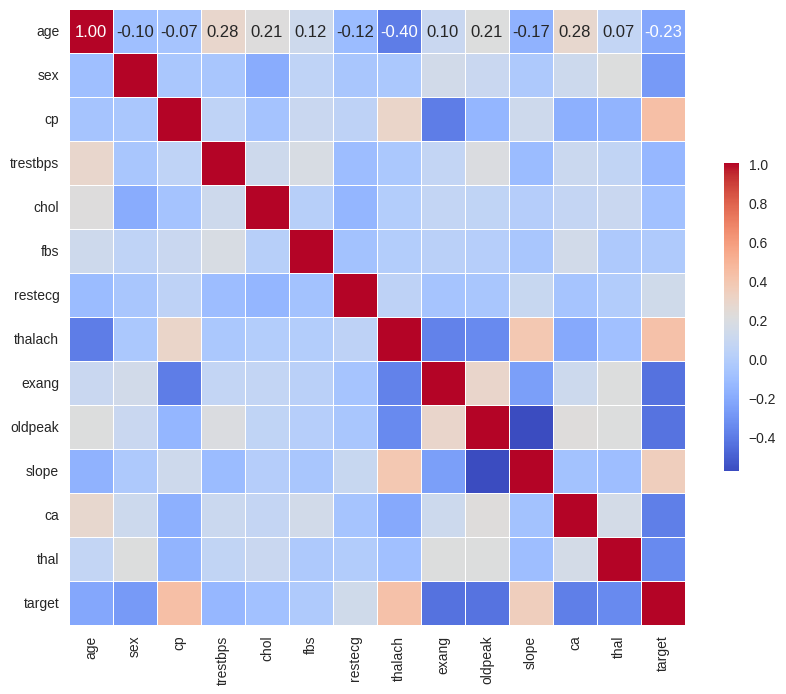

In [4]:
# Calculate the correlation matrix
corr = df.corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
# Show the plot
plt.show()


## Exploratory Data Analysis (EDA)

## 5.1 | Disease Distribution based on Chest Pain Type in Each Gender</div>

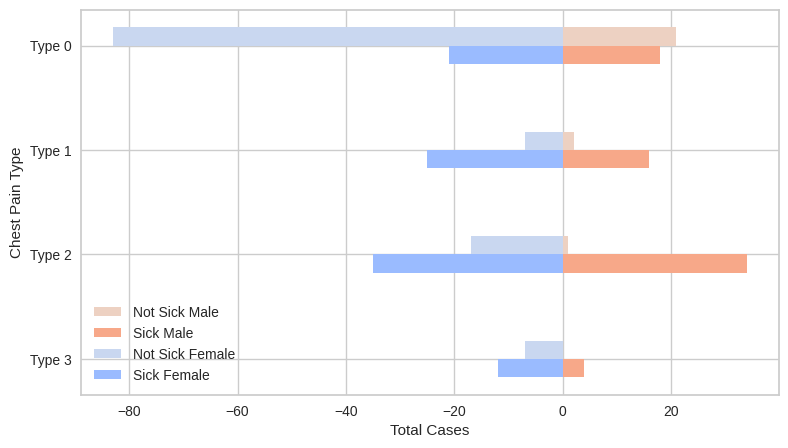

In [5]:

df_eda1 = df[['sex', 'cp', 'target']]

# Create a complete set of combinations to avoid missing categories in subsets
cp_types = df['cp'].unique()
sex_types = df['sex'].unique()
target_types = df['target'].unique()
all_combinations = pd.MultiIndex.from_product([sex_types, cp_types, target_types], names=['sex', 'cp', 'target'])
df_eda1 = df_eda1.groupby(['sex', 'cp', 'target']).size().reindex(all_combinations, fill_value=0).reset_index(name='total')

# Recreate subsets
df_eda1_mns = df_eda1.query('sex == 0 & target == 0')
df_eda1_ms = df_eda1.query('sex == 0 & target == 1')
df_eda1_fns = df_eda1.query('sex == 1 & target == 0')
df_eda1_fs = df_eda1.query('sex == 1 & target == 1')

# y values based on cp unique values
y = np.arange(len(cp_types))

# Plot configuration
fig, ax = plt.subplots(figsize=(9, 5))
colors = sns.color_palette("coolwarm", 6)  # Assuming 6 colors are enough
bar_height = 0.35

# Plot each group, using slicing to ensure alignment
ax.barh(y + bar_height / 2, df_eda1_mns['total'], color=colors[3], height=bar_height / 2, label='Not Sick Male')
ax.barh(y, df_eda1_ms['total'], color=colors[4], height=bar_height / 2, label='Sick Male')
ax.barh(y + bar_height / 2, -df_eda1_fns['total'], color=colors[2], height=bar_height / 2, label='Not Sick Female')
ax.barh(y, -df_eda1_fs['total'], color=colors[1], height=bar_height / 2, label='Sick Female')

# Ticks and labels
ax.set_yticks(y + bar_height / 4)
ax.set_yticklabels(['Type ' + str(int(cp)) for cp in cp_types])
ax.set_xlabel('Total Cases')
ax.set_ylabel('Chest Pain Type')
ax.legend()

# Show the plot
plt.show()


## 5.2 | Maximum Heart Rate vs. Age based on Patients Sickness

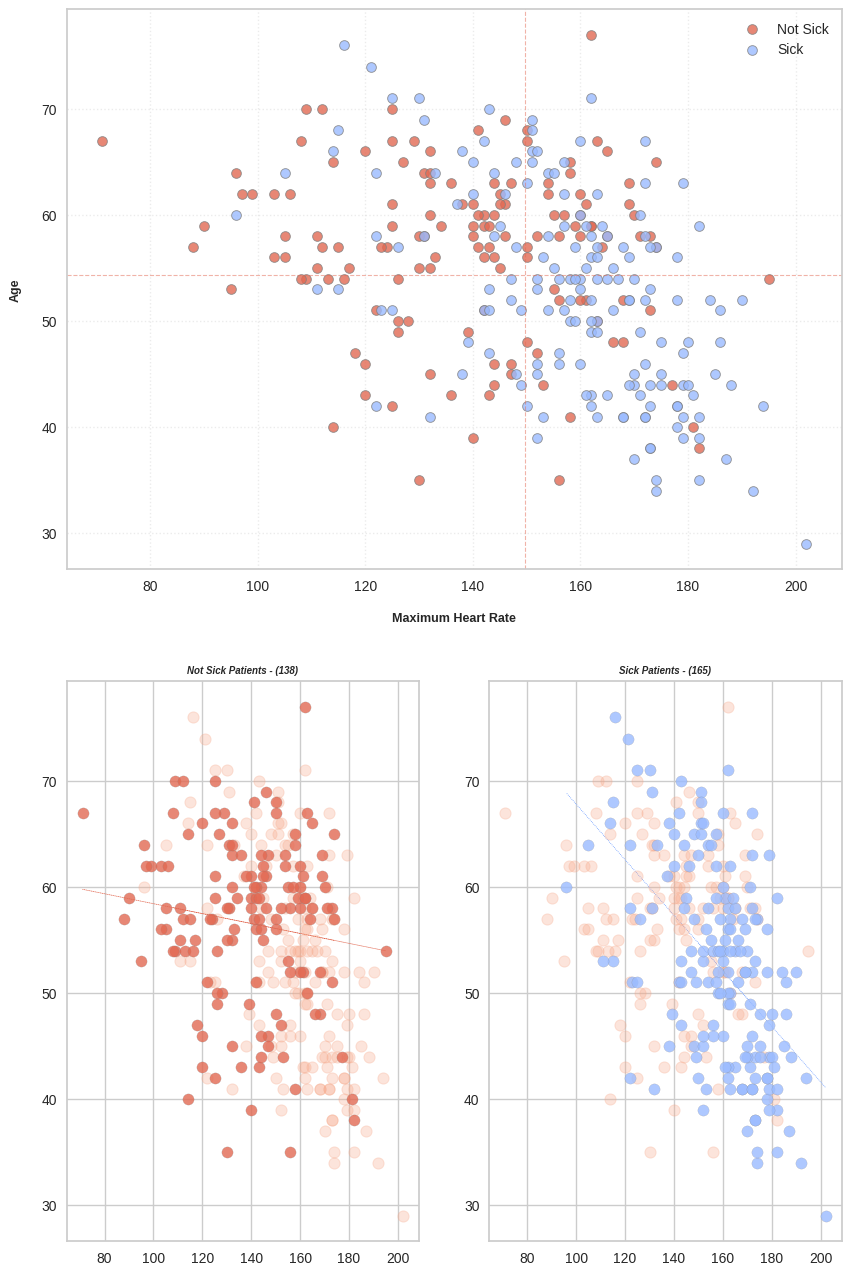

In [6]:
# Define the necessary color variables and styles
colors = sns.color_palette('coolwarm', 6)
scatter_color_edge = 'gray'
color_grid = 'silver'
color_line = 'black'
font_main = 'Arial'
font_alt = 'Helvetica'
tick_params = dict(length=3, width=1)

# --- EDA 2 Variables ---
scatter_style = dict(linewidth=0.65, edgecolor=scatter_color_edge, alpha=0.8)
sub_scatter_style_color = dict(s=65, alpha=0.8, linewidth=0.15, zorder=10, edgecolor=scatter_color_edge)
sub_scatter_style_grey = dict(s=65, alpha=0.3, linewidth=0.7, zorder=5, color=colors[4])
grid_style = dict(alpha=0.3, color=color_grid, linestyle='dotted', zorder=1)
xy_label = dict(fontweight='bold', fontsize=9)
suptitle = dict(x=0.12, y=0.62, fontsize=16, weight='heavy', ha='left', va='bottom', fontname=font_main)
title = dict(x=0.12, y=0.605, fontsize=10, weight='normal', ha='left', va='bottom', fontname=font_alt)
color_palette = [colors[5], colors[1]]
target_labels = [[0, 1], ['Not Sick', 'Sick']]
highlight_textprops = [{'weight':'bold', 'color': colors[5]}, {'weight':'bold', 'color': colors[1]}, {'weight':'bold', 'color': colors[1]}]
highlight_mean = [{'fontsize':7, 'color': 'black'}, {'fontsize':8, 'weight':'bold', 'color': colors[5]}]
sub_axes = [None] * 2

# --- EDA 2 Dataframe & Figure Settings ---
df_eda2 = df[['target', 'age', 'thalach']]
age_mean = df_eda2.age.mean()
thalach_mean = df_eda2.thalach.mean()
fig = plt.figure(figsize=(10, 16))
gs = fig.add_gridspec(2, 2)
ax = fig.add_subplot(gs[0, :])
ax.set_aspect('auto')

# --- EDA 2: Main Scatter Plot ---
ax.axvline(x=thalach_mean, linewidth=0.8, linestyle='--', color=colors[5], alpha=0.5)
ax.axhline(y=age_mean, linewidth=0.8, linestyle='--', color=colors[5], alpha=0.5)
for x in range(len(target_labels[0])):
    df_eda2_temp = df_eda2[df_eda2['target'] == target_labels[0][x]]
    ax.scatter(df_eda2_temp['thalach'], df_eda2_temp['age'], color=color_palette[x], **scatter_style, label=target_labels[1][x])
ax.set_xlabel('\nMaximum Heart Rate', **xy_label)
ax.set_ylabel('Age\n', **xy_label)
ax.grid(True, **grid_style)
ax.legend()

# --- EDA 2: Sub Plots ---
for idx, trgt in enumerate(target_labels[0]):
    gs_thalach = df_eda2[df_eda2['target'] != trgt]['thalach']
    gs_age = df_eda2[df_eda2['target'] != trgt]['age']
    cs_thalach = df_eda2[df_eda2['target'] == trgt]['thalach']
    cs_age = df_eda2[df_eda2['target'] == trgt]['age']

    sub_axes[idx] = fig.add_subplot(gs[1, idx], aspect='auto')
    sub_axes[idx].scatter(gs_thalach, gs_age, **sub_scatter_style_grey)
    sub_axes[idx].scatter(cs_thalach, cs_age, color=color_palette[idx], **sub_scatter_style_color)
    m, b = np.polyfit(cs_thalach, cs_age, deg=1)
    sub_axes[idx].plot(cs_thalach, m * cs_thalach + b, linewidth=0.5, color=color_palette[idx], linestyle='dotted')
    
    cnt = (df_eda2['target'] == trgt).sum()
    sub_axes[idx].set_title(f'{target_labels[1][trgt]} Patients - ({cnt})', fontsize=7, style='italic', weight='bold', ha='center')

plt.show()


## <div class="header2">5.3 | Fasting Blood Sugar Distribution by Resting Electrocardiographic Results</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

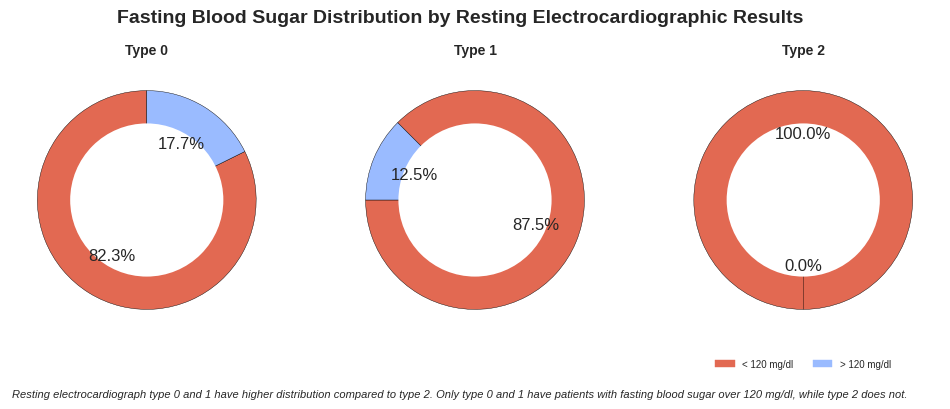

In [7]:
colors = sns.color_palette('coolwarm', 6)
font_main = 'Arial'
font_alt = 'Helvetica'


df_eda3 = df[['fbs', 'restecg']]
df_eda3 = pd.DataFrame(df_eda3.groupby(['fbs', 'restecg']).size().reset_index(name='total'))
df_eda3.loc[len(df_eda3.index)] = [1, 2, 0]  # Ensuring all categories are represented
df_eda3_0 = df_eda3.query('restecg == 0').drop('restecg', axis=1)
df_eda3_1 = df_eda3.query('restecg == 1').drop('restecg', axis=1)
df_eda3_2 = df_eda3.query('restecg == 2').drop('restecg', axis=1)

# --- EDA 3 Variables ---
total_list = [df_eda3_0['total'], df_eda3_1['total'], df_eda3_2['total']]
sample_num = [90, 180, 270]  # Start angles for pie charts

# --- EDA 3 Functions ---
def display_eda3(subplot_num, restecg_type, total, colors, start_angle):
    center = plt.Circle((0, 0), 0.7, color='white', lw=0)
    plt.subplot(1, 3, subplot_num)
    plt.pie(total, colors=colors, autopct='%.1f%%', startangle=start_angle, wedgeprops={'edgecolor': 'black'})
    plt.title(f'Type {restecg_type}', fontsize=10, fontweight='bold')
    plt.gca().add_artist(center)

# --- Display EDA 3 ---
plt.figure(figsize=(12, 4))
for idx, total in enumerate(total_list):
    display_eda3(idx+1, idx, total, [colors[5], colors[1]], sample_num[idx])

plt.figtext(0.5, 0.95, "Fasting Blood Sugar Distribution by Resting Electrocardiographic Results", ha='center', va='center', fontsize=14, fontweight='heavy')
plt.figtext(0.5, 0.01, "Resting electrocardiograph type 0 and 1 have higher distribution compared to type 2. Only type 0 and 1 have patients with fasting blood sugar over 120 mg/dl, while type 2 does not.", ha='center', va='center', fontsize=8, fontstyle='italic')
plt.legend(handles=[mpatches.Patch(color=colors[5], label='< 120 mg/dl'), mpatches.Patch(color=colors[1], label='> 120 mg/dl')], loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=7)
plt.show()


## 5.4 | Resting Blood Pressure Distribution based on Slope

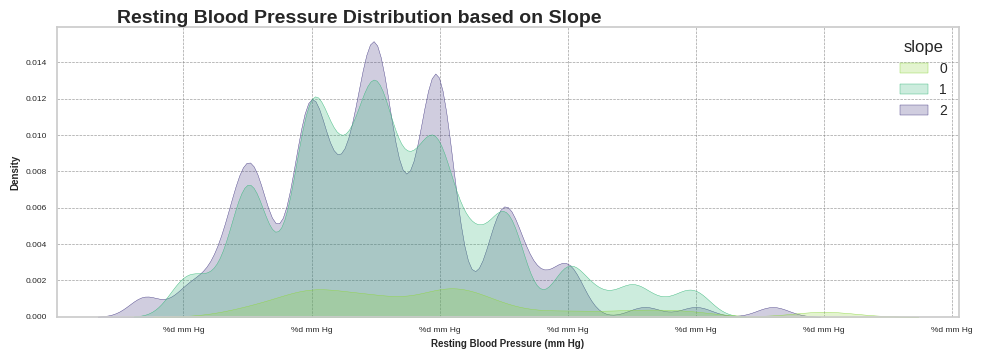

In [10]:
df_eda5 = df[['slope', 'trestbps']]
df_eda5['slope'] = df_eda5['slope'].astype(str)  # Safely convert 'slope' to string

# Set up colors and styles
colors = sns.color_palette("viridis", 5)  # Adjust this to fit the number of categories
color_line = 'gray'
scatter_color_edge = 'black'
font_main = 'Arial'
font_alt = 'Helvetica'

# Variables setup
slope_list = sorted(df_eda5['slope'].unique())
color_palette = [colors[4], colors[3], colors[0]]

# Creating the figure and subplots
fig = plt.figure(figsize=(10, 7))
gs = fig.add_gridspec(6, 3)
ax = fig.add_subplot(gs[:3, :])

# Main KDE Plot
sns.kdeplot(x='trestbps', hue='slope', data=df_eda5, palette=color_palette, hue_order=slope_list, bw_adjust=0.4, fill=True, ax=ax)
#ax.legend(title='Slope Type', frameon=False)
ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.75)
ax.set_xlabel('Resting Blood Pressure (mm Hg)', fontweight='bold', fontsize=7)
ax.set_ylabel('Density', fontweight='bold', fontsize=7)
ax.xaxis.set_major_formatter(('%d mm Hg'))
ax.tick_params(axis='both', which='both', labelsize=6)

# Adding titles and texts
fig.suptitle('Resting Blood Pressure Distribution based on Slope', fontsize=14, fontweight='heavy', ha='left', va='bottom', x=0.125, y=0.925)

plt.tight_layout()
plt.show()


# 6. | Data Preprocessing

In [11]:
# --- Seperating Dependent Features ---
x = df.drop(['target'], axis=1)
y = df['target']

# --- Splitting Dataset ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 6.2 | Processing Pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

# --- Numerical Pipeline ---
num_column = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
num_pipeline = Pipeline([
    ('scaling', RobustScaler())
])

# --- Categorical Pipeline ---
cat_column = ['cp', 'slope', 'thal']
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# --- Combine Both Pipelines into Transformer ---
preprocessor = ColumnTransformer([
    ('categorical', cat_pipeline, cat_column),
    ('numerical', num_pipeline, num_column)
], remainder='passthrough')

# --- Apply Transformer to Pipeline ---
process_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Apply to DataFrame
x_train_process = process_pipeline.fit_transform(x_train)
x_test_process = process_pipeline.transform(x_test)


# 7. | Model Implementation
#### Confusion matrix will show each models performance

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix, ROCAUC, PrecisionRecallCurve
from yellowbrick.model_selection import LearningCurve
from yellowbrick.features import FeatureImportances  # Correct import for FeatureImportances
from sklearn.linear_model import LogisticRegression

def fit_ml_models(algo, algo_param, algo_name, x_train, y_train, x_test, y_test):
    # Formatting for display
    clr = lambda x: f"\033[1;36m{x}\033[0m"  # Example ANSI escape to color the text

    # --- Algorithm Pipeline ---
    algo_pipeline = Pipeline([('algo', algo)])
    
    # --- Apply Grid Search ---
    model = GridSearchCV(algo_pipeline, param_grid=algo_param, cv=10, n_jobs=-1, verbose=1)
    
    # --- Fitting Model ---
    print(clr(".:. Fitting " + algo_name + " .:."))
    model.fit(x_train, y_train)
    
    # --- Model Best Parameters ---
    best_params = model.best_params_
    print("\n>> Best Parameters: ", clr(str(best_params)))
    
    # --- Best Estimator and Score ---
    best_model = model.best_estimator_
    best_score = round(model.best_score_, 4)
    print(">> Best Score: ", clr(f"{best_score:.3f}"))
    
    # --- Create Prediction for Train & Test ---
    y_pred_train = best_model.predict(x_train)
    y_pred_test = best_model.predict(x_test)
    
    # --- Train & Test Accuracy Score ---
    acc_score_train = round(accuracy_score(y_train, y_pred_train) * 100, 3)
    acc_score_test = round(accuracy_score(y_test, y_pred_test) * 100, 3)
    print(f".:. Train and Test Accuracy Score for {algo_name} .:.")
    print(f"\t>> Train Accuracy: {acc_score_train:.2f}%")
    print(f"\t>> Test Accuracy: {acc_score_test:.2f}%")

    # --- Classification Report ---
    print(f".:. Classification Report for {algo_name} .:.")
    print(classification_report(y_test, y_pred_test))

    # Confusion Matrix
    cm_viz = ConfusionMatrix(best_model)
    # Custom colors for confusion matrix
    cmap = ListedColormap(['red', 'green', 'green', 'red'])
    cm_viz = ConfusionMatrix(
        best_model,
        classes=['negative', 'positive'],
        cmap= "YlOrRd", #cmap,
        percent=True
    )
    cm_viz.fit(x_train, y_train)
    cm_viz.score(x_test, y_test)
    cm_viz.poof()

    # ROC AUC
    roc_viz = ROCAUC(best_model)
    roc_viz.fit(x_train, y_train)  # Fit the training data to the visualizer
    roc_viz.score(x_test, y_test)  # Evaluate the model on the test data
    roc_viz.show()  # Finalize and render the figure

    # Learning Curve
    learning_viz = LearningCurve(best_model)
    learning_viz.fit(x_train, y_train)
    learning_viz.show()

    # # Feature Importances
    # try:
    #     feature_viz = FeatureImportances(best_model, ax=axes[1, 1], labels=x_train.columns.tolist(), colors=color_yb_importance)
    #     feature_viz.fit(x_train, y_train)
    #     feature_viz.poof()
    # except AttributeError:
    #     print("Feature importances are not available for this model.")

    #plt.tight_layout()
    plt.show()

    return acc_score_train, acc_score_test, best_score


## 7.1 | Logistic Regression

.:. Fitting Logistic Regression .:.
Fitting 10 folds for each of 12 candidates, totalling 120 fits



>> Best Parameters:  {'algo__C': 0.1, 'algo__solver': 'lbfgs'}
>> Best Score:  0.827
.:. Train and Test Accuracy Score for Logistic Regression .:.
	>> Train Accuracy: 85.12%
	>> Test Accuracy: 88.53%
.:. Classification Report for Logistic Regression .:.
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



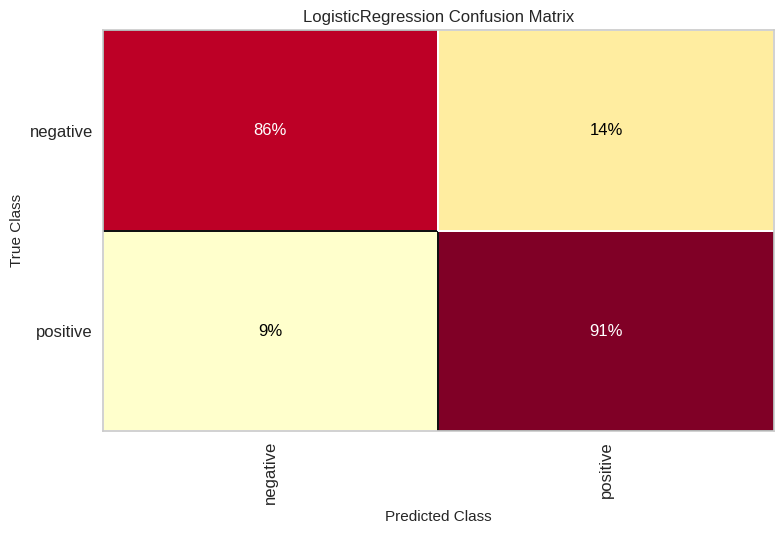

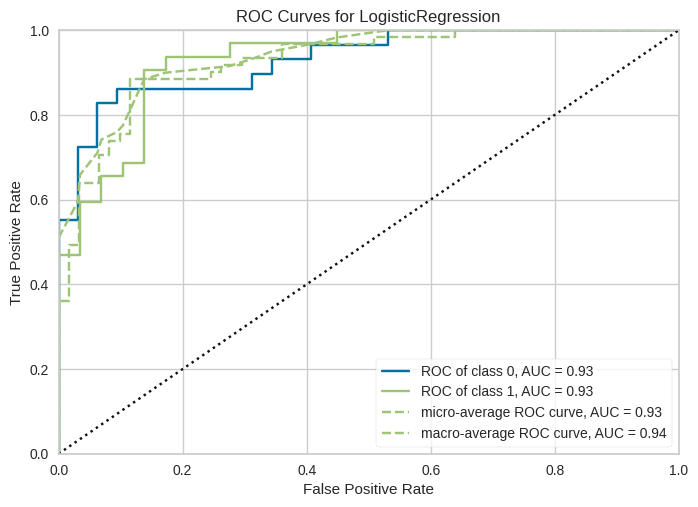

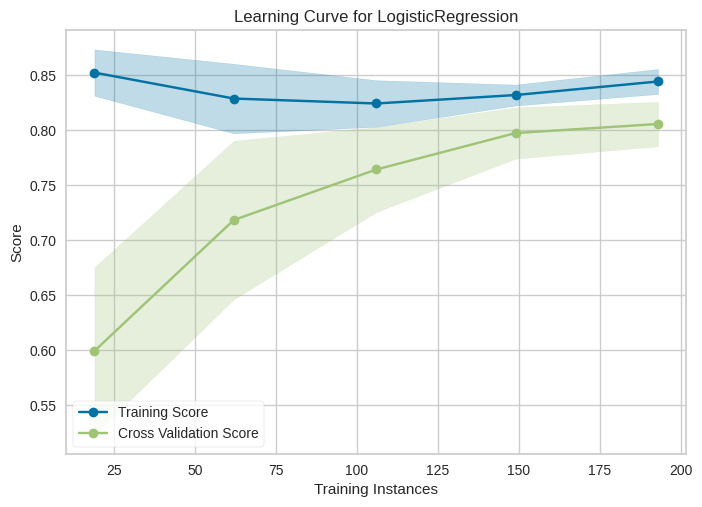

In [14]:
# --- Logistic Regression Parameters ---
parameter_lr = {"algo__solver": ["lbfgs", "saga", "newton-cg"]
                , "algo__C": [0.1, 0.2, 0.5, 0.8]}

# --- Logistic Regression Algorithm ---
algo_lr = LogisticRegression(penalty="l2", random_state=42, n_jobs=-1)

# --- Applying Logistic Regression ---
#acc_score_train_lr, acc_score_test_lr, best_score_lr = fit_ml_models(algo_lr, parameter_lr, "Logistic Regression",x_train, x_test, y_train, y_test )
acc_score_train_lr, acc_score_test_lr, best_score_lr = fit_ml_models(
    algo_lr, 
    parameter_lr, 
    "Logistic Regression",
    x_train, 
    y_train, 
    x_test, 
    y_test
)


## 7.2 | K-Nearest Neighbour (KNN)

.:. Fitting K-Nearest Neighbour (KNN) .:.
Fitting 10 folds for each of 16 candidates, totalling 160 fits

>> Best Parameters:  {'algo__leaf_size': 1, 'algo__n_neighbors': 17}
>> Best Score:  0.649
.:. Train and Test Accuracy Score for K-Nearest Neighbour (KNN) .:.
	>> Train Accuracy: 68.59%
	>> Test Accuracy: 68.85%
.:. Classification Report for K-Nearest Neighbour (KNN) .:.
              precision    recall  f1-score   support

           0       0.68      0.66      0.67        29
           1       0.70      0.72      0.71        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



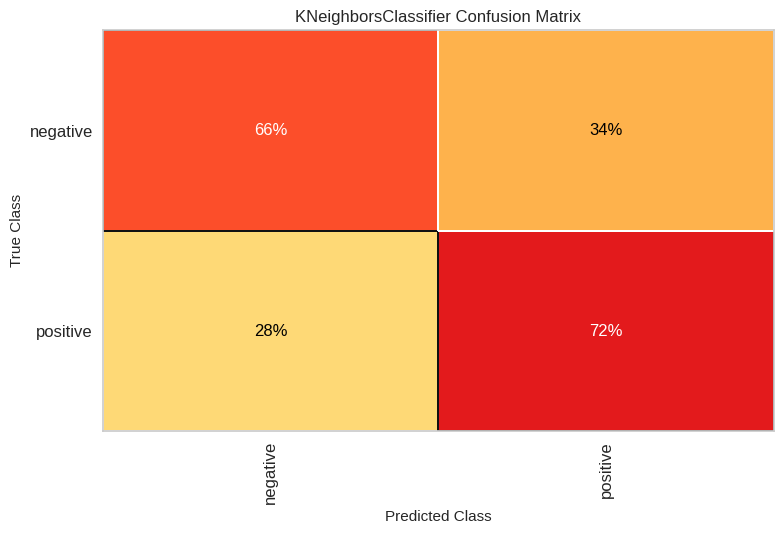

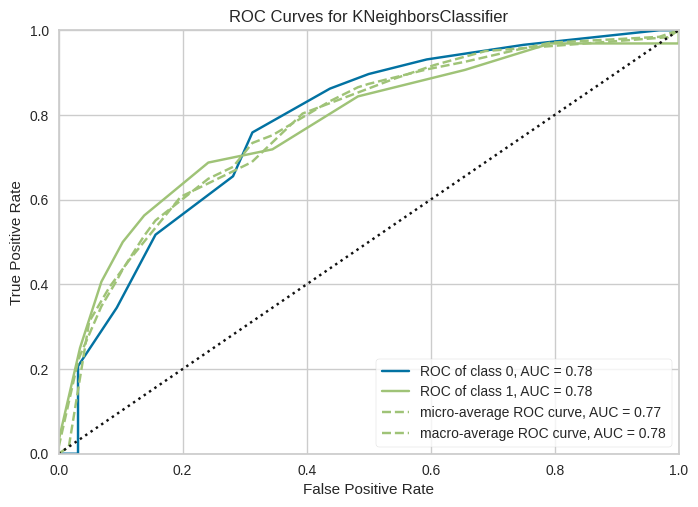

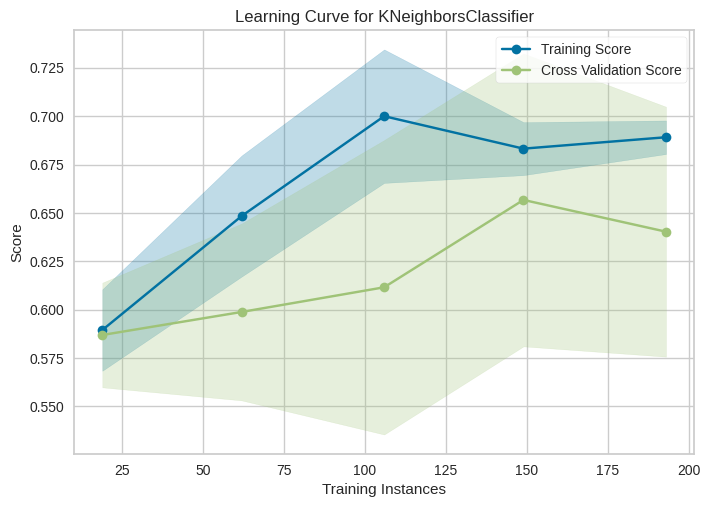

In [15]:
# --- KNN Parameters ---
parameter_knn = {"algo__n_neighbors": [2, 5, 10, 17]
                , "algo__leaf_size": [1, 10, 11, 30]}

# --- KNN Algorithm ---
algo_knn = KNeighborsClassifier(n_jobs=-1)

# --- Applying KNN ---
acc_score_train_knn, acc_score_test_knn, best_score_knn = fit_ml_models(
    algo_knn, 
    parameter_knn, 
    "K-Nearest Neighbour (KNN)",
    x_train, 
    y_train, 
    x_test, 
    y_test
)

## 7.3 | Support Vector Machine (SVM)

.:. Fitting Support Vector Machine (SVM) .:.
Fitting 10 folds for each of 171 candidates, totalling 1710 fits

>> Best Parameters:  {'algo__C': 0.5, 'algo__kernel': 'linear'}
>> Best Score:  0.819
.:. Train and Test Accuracy Score for Support Vector Machine (SVM) .:.
	>> Train Accuracy: 85.95%
	>> Test Accuracy: 86.89%
.:. Classification Report for Support Vector Machine (SVM) .:.
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



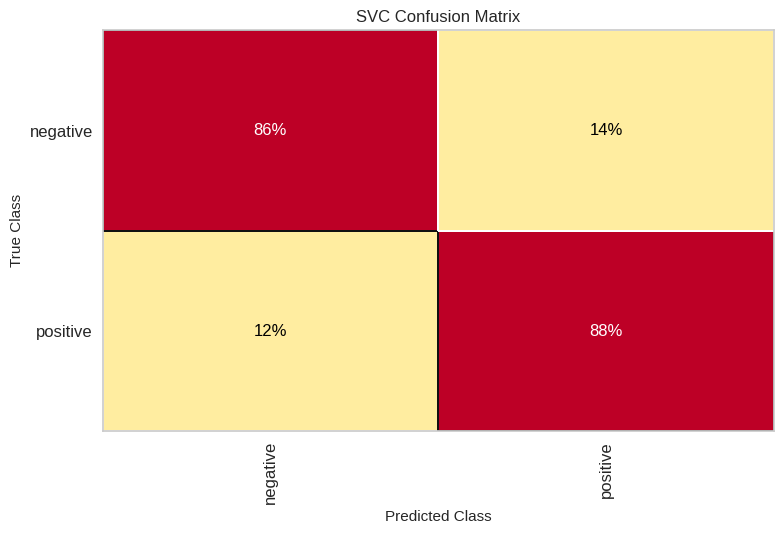

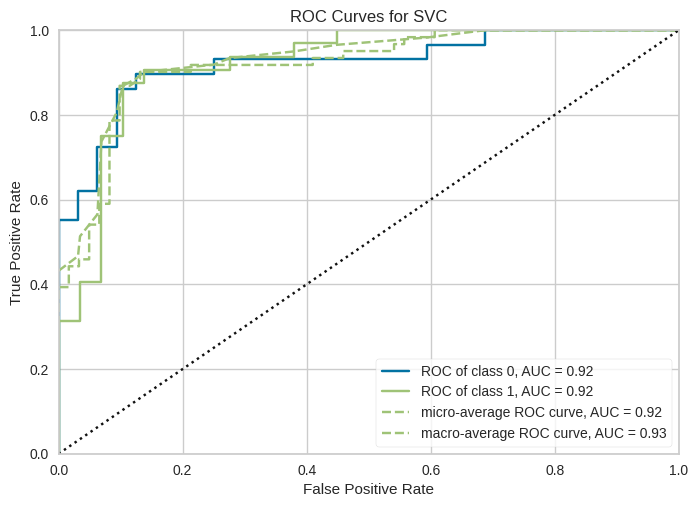

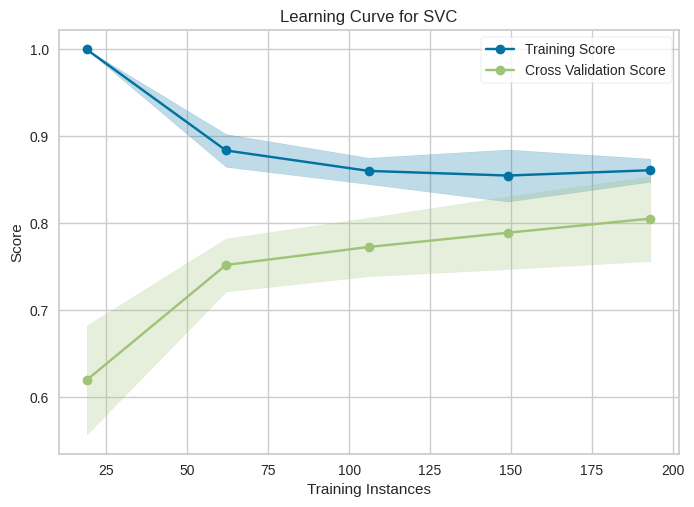

In [16]:
# --- SVM Parameters ---
parameter_svc = [
    {'algo__kernel': ['rbf'], 'algo__gamma': np.arange(0.1, 1, 0.1), 'algo__C': np.arange(0.1, 1, 0.1)}
    , {'algo__kernel': ['linear'], 'algo__C': np.arange(0.1, 1, 0.1)}
    , {'algo__kernel': ['poly'], 'algo__degree' : np.arange(1, 10, 1), 'algo__C': np.arange(0.1, 1, 0.1)}
]

# --- SVM Algorithm ---
algo_svc = SVC(random_state=1, probability=True)

# --- Applying SVM ---
acc_score_train_svc, acc_score_test_svc, best_score_svc = fit_ml_models(
    algo_svc, 
    parameter_svc, 
    "Support Vector Machine (SVM)",
    x_train, 
    y_train, 
    x_test, 
    y_test
)

## 7.4 | Gaussian Naive Bayes

.:. Fitting Gaussian Naive Bayes .:.
Fitting 10 folds for each of 4 candidates, totalling 40 fits

>> Best Parameters:  {'algo__var_smoothing': 1e-06}
>> Best Score:  0.793
.:. Train and Test Accuracy Score for Gaussian Naive Bayes .:.
	>> Train Accuracy: 81.82%
	>> Test Accuracy: 86.89%
.:. Classification Report for Gaussian Naive Bayes .:.
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



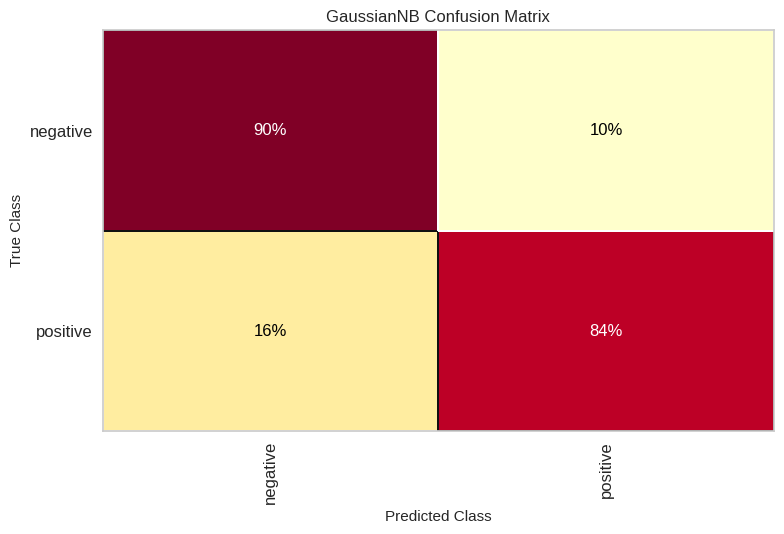

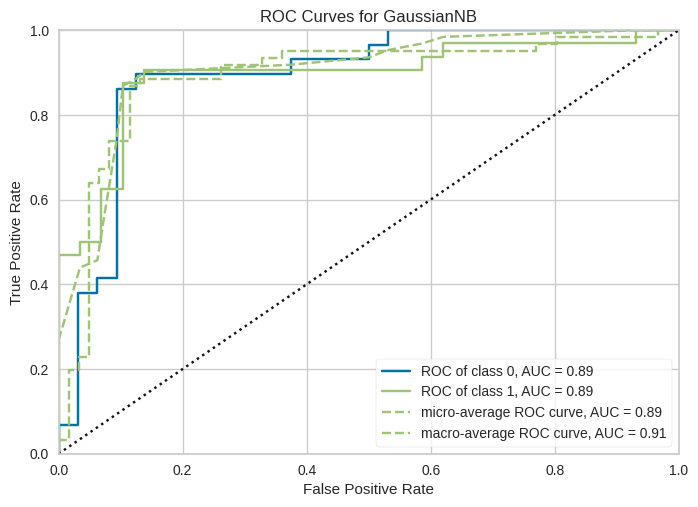

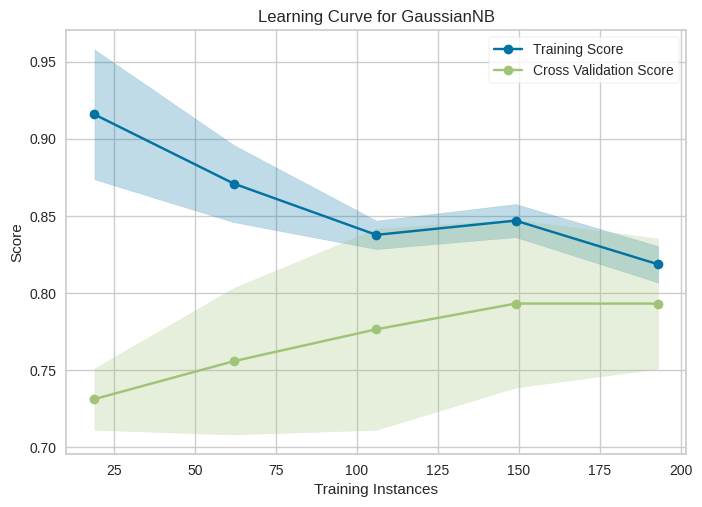

In [17]:
# --- Gaussian NB Parameters ---
parameter_gnb = {"algo__var_smoothing": [1e-2, 1e-3, 1e-4, 1e-6]}

# --- Gaussian NB Algorithm ---
algo_gnb = GaussianNB()

# --- Applying Gaussian NB ---
acc_score_train_gnb, acc_score_test_gnb, best_score_gnb = fit_ml_models(
    algo_gnb, 
    parameter_gnb, 
    "Gaussian Naive Bayes",
    x_train, 
    y_train, 
    x_test, 
    y_test
)

## 7.5 | Decision Tree

.:. Fitting Decision Tree .:.
Fitting 10 folds for each of 3 candidates, totalling 30 fits

>> Best Parameters:  {'algo__max_depth': 3}
>> Best Score:  0.790
.:. Train and Test Accuracy Score for Decision Tree .:.
	>> Train Accuracy: 84.71%
	>> Test Accuracy: 81.97%
.:. Classification Report for Decision Tree .:.
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



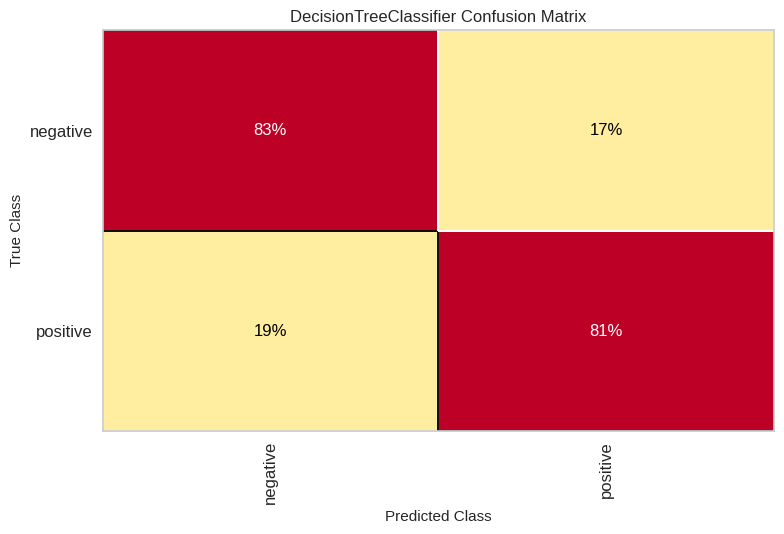

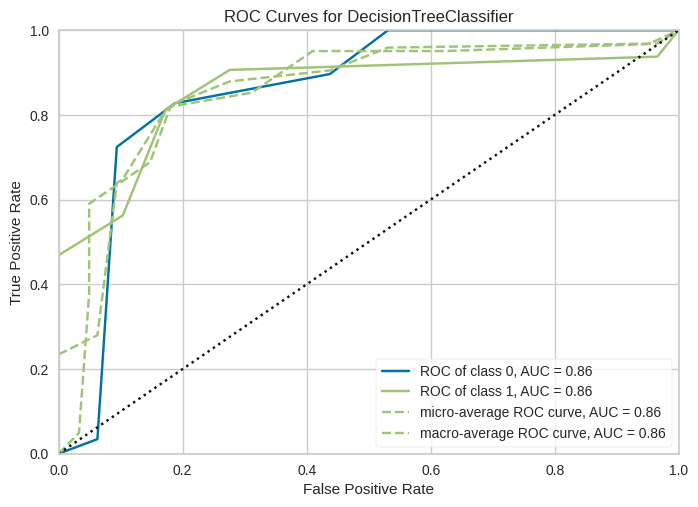

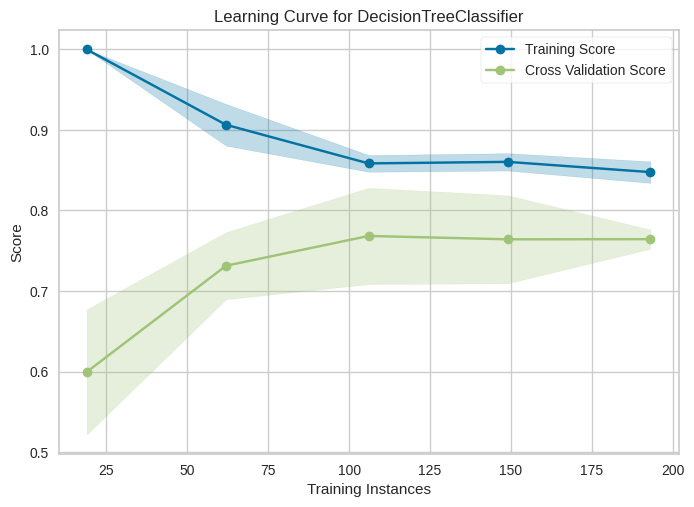

In [18]:
# --- Decision Tree Parameters ---
parameter_dt = {"algo__max_depth": [1, 2, 3]}

# --- Decision Tree Algorithm ---
algo_dt = DecisionTreeClassifier(random_state=42)

# --- Applying Decision Tree ---
acc_score_train_dt, acc_score_test_dt, best_score_dt = fit_ml_models(
    algo_dt, 
    parameter_dt, 
    "Decision Tree",
    x_train, 
    y_train, 
    x_test, 
    y_test
)

## 7.6 | Random Forest

.:. Fitting Random Forest .:.
Fitting 10 folds for each of 5 candidates, totalling 50 fits

>> Best Parameters:  {'algo__max_depth': 2}
>> Best Score:  0.839
.:. Train and Test Accuracy Score for Random Forest .:.
	>> Train Accuracy: 87.19%
	>> Test Accuracy: 88.53%
.:. Classification Report for Random Forest .:.
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



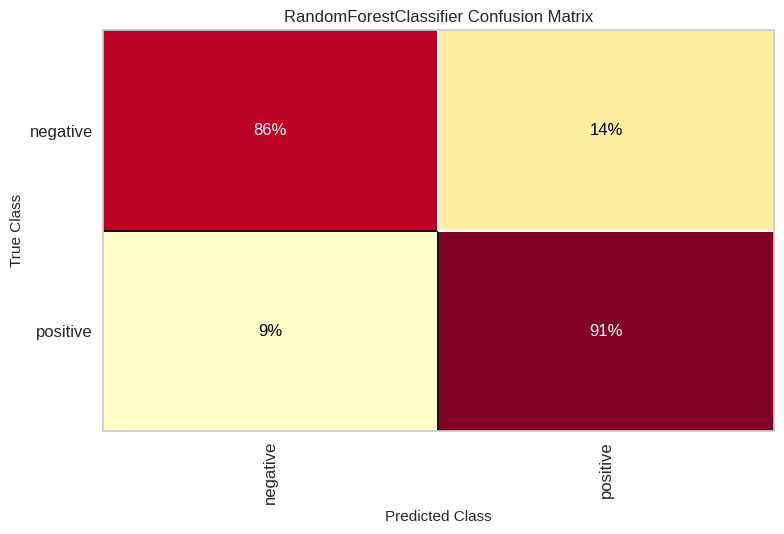

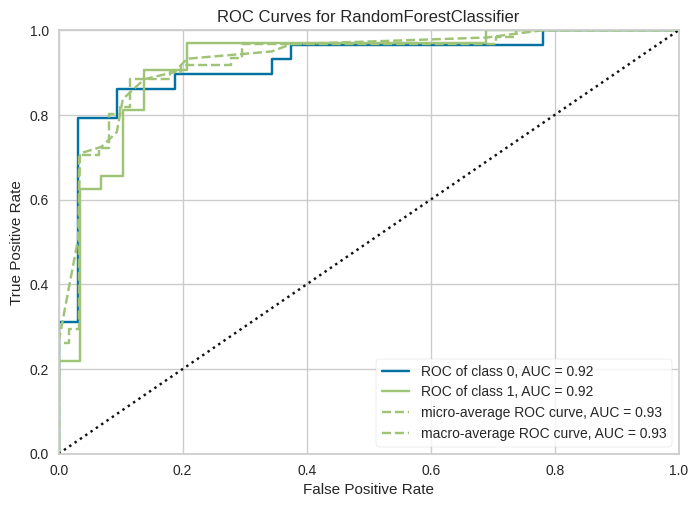

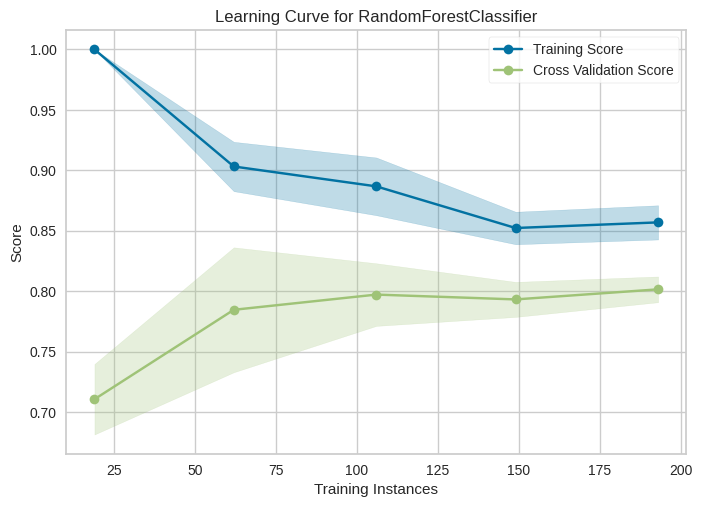

In [19]:
# --- Random Forest Parameters ---
parameter_rf = {"algo__max_depth": np.arange(1, 6, 1)}

# --- Random Forest Algorithm ---
algo_rf = RandomForestClassifier(random_state=99, n_jobs=-1)

# --- Applying Random Forest ---
acc_score_train_rf, acc_score_test_rf, best_score_rf = fit_ml_models(
    algo_rf, 
    parameter_rf, 
    "Random Forest",
    x_train, 
    y_train, 
    x_test, 
    y_test
)

## 7.7 | Extra Tree Classifier

.:. Fitting Extra Tree Classifier .:.
Fitting 10 folds for each of 6 candidates, totalling 60 fits

>> Best Parameters:  {'algo__max_depth': 3, 'algo__max_leaf_nodes': 5}
>> Best Score:  0.810
.:. Train and Test Accuracy Score for Extra Tree Classifier .:.
	>> Train Accuracy: 83.47%
	>> Test Accuracy: 85.25%
.:. Classification Report for Extra Tree Classifier .:.
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



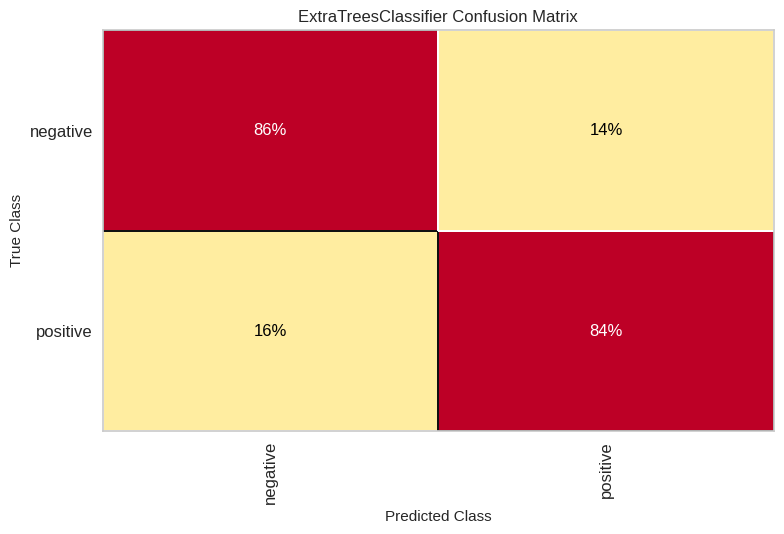

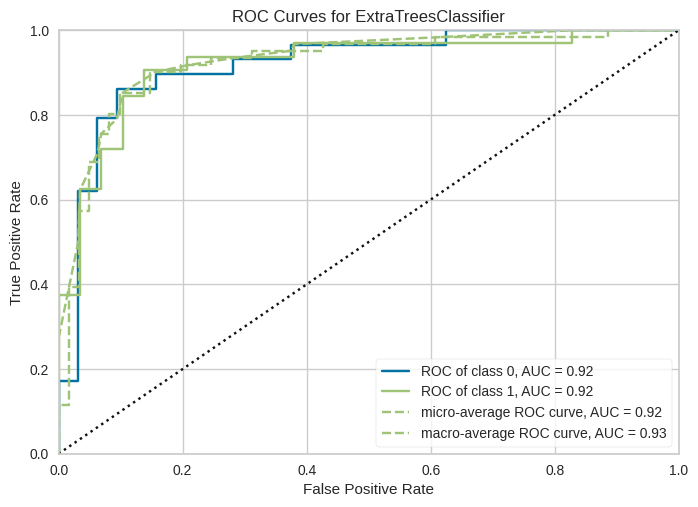

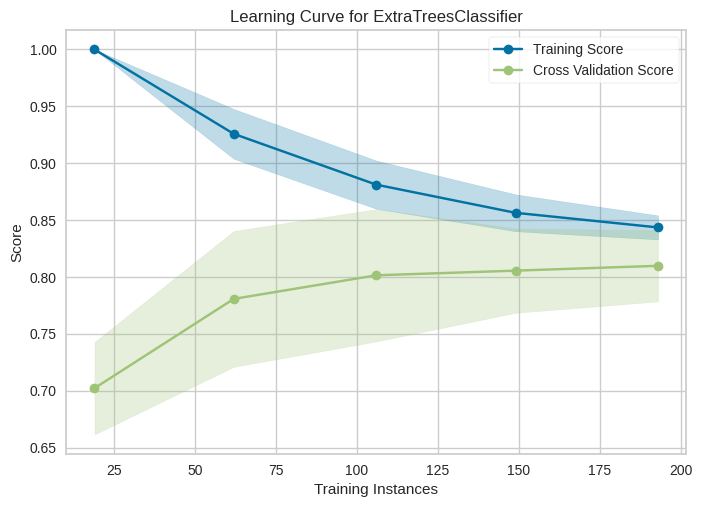

In [20]:
# --- Extra Tree Parameters ---
parameter_et = {"algo__max_depth": [2, 3]
    , "algo__max_leaf_nodes": [3, 5, 7]}

# --- Extra Tree Algorithm ---
algo_et = ExtraTreesClassifier(random_state=42, n_jobs=-1)

# --- Applying Extra Tree ---
acc_score_train_et, acc_score_test_et, best_score_et = fit_ml_models(algo_et, parameter_et, "Extra Tree Classifier", x_train, y_train, x_test, y_test)

## 7.8 | Gradient Boosting

.:. Fitting Gradient Boosting .:.
Fitting 10 folds for each of 27 candidates, totalling 270 fits

>> Best Parameters:  {'algo__learning_rate': 0.3, 'algo__min_weight_fraction_leaf': 0.2, 'algo__n_estimators': 6}
>> Best Score:  0.827
.:. Train and Test Accuracy Score for Gradient Boosting .:.
	>> Train Accuracy: 85.12%
	>> Test Accuracy: 86.89%
.:. Classification Report for Gradient Boosting .:.
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



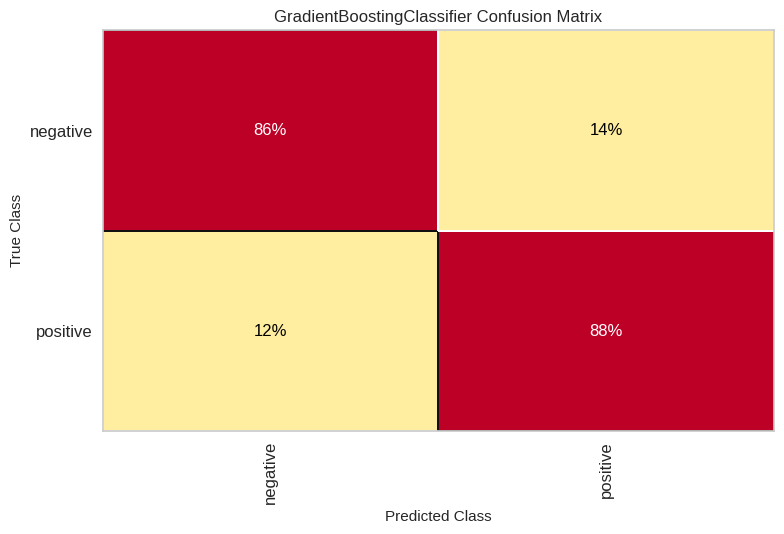

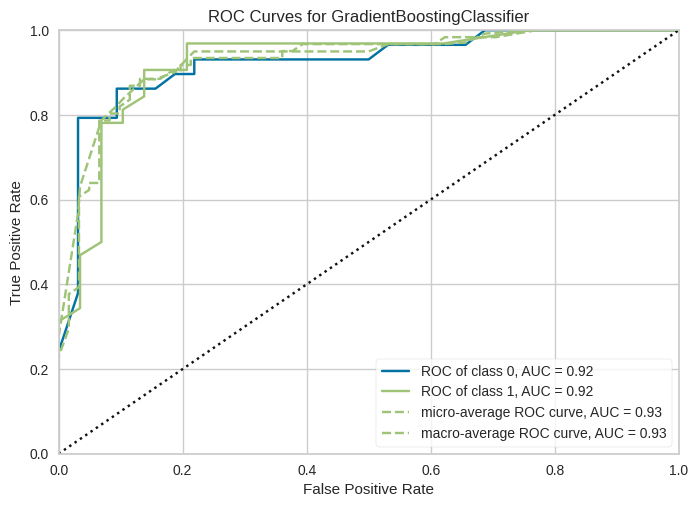

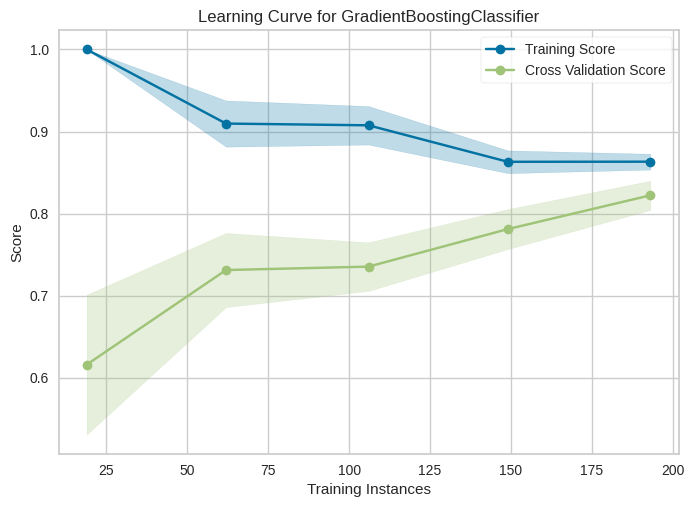

In [21]:
# --- Gradient Boosting Parameters ---
parameter_gb = {
    "algo__learning_rate": [0.1, 0.3, 0.5]
    , "algo__n_estimators": [2, 4, 6]
    , "algo__min_weight_fraction_leaf": [0.1, 0.2, 0.5]
}

# --- Gradient Boosting Algorithm ---
algo_gb = GradientBoostingClassifier(loss="exponential", random_state=2)

# --- Applying Gradient Boosting ---
acc_score_train_gb, acc_score_test_gb, best_score_gb = fit_ml_models(algo_gb, parameter_gb, "Gradient Boosting" , x_train, y_train, x_test, y_test)

## 7.9 | AdaBoost

.:. Fitting AdaBoost .:.
Fitting 10 folds for each of 9 candidates, totalling 90 fits

>> Best Parameters:  {'algo__learning_rate': 0.2, 'algo__n_estimators': 6}
>> Best Score:  0.823
.:. Train and Test Accuracy Score for AdaBoost .:.
	>> Train Accuracy: 83.88%
	>> Test Accuracy: 86.89%
.:. Classification Report for AdaBoost .:.
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



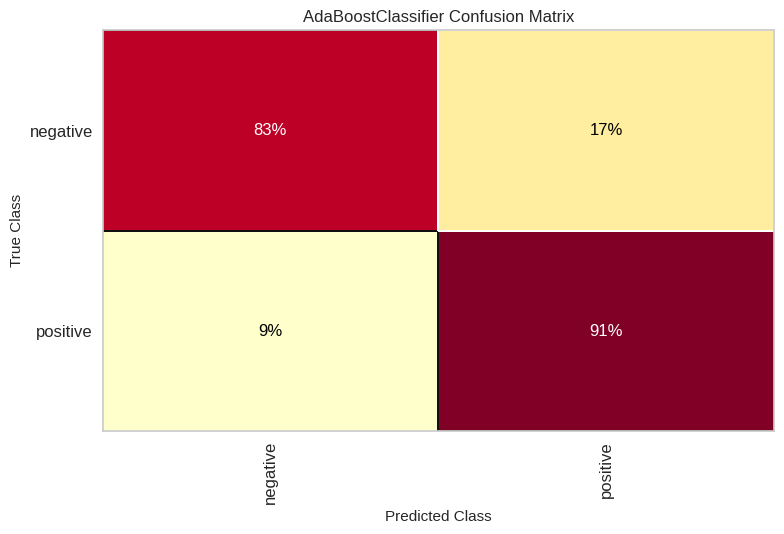

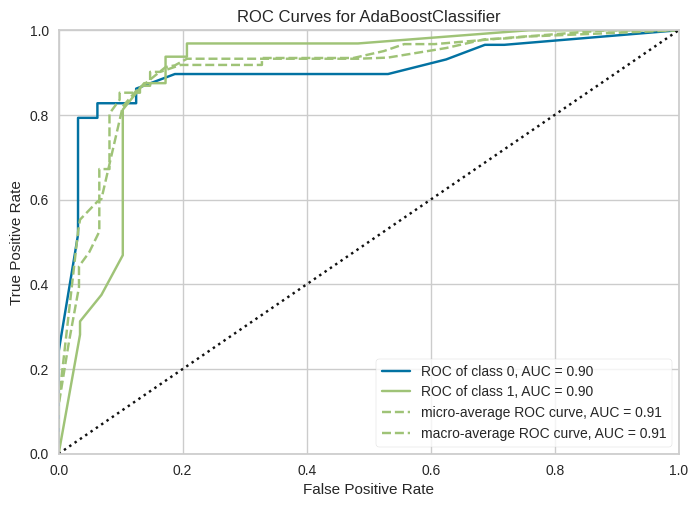

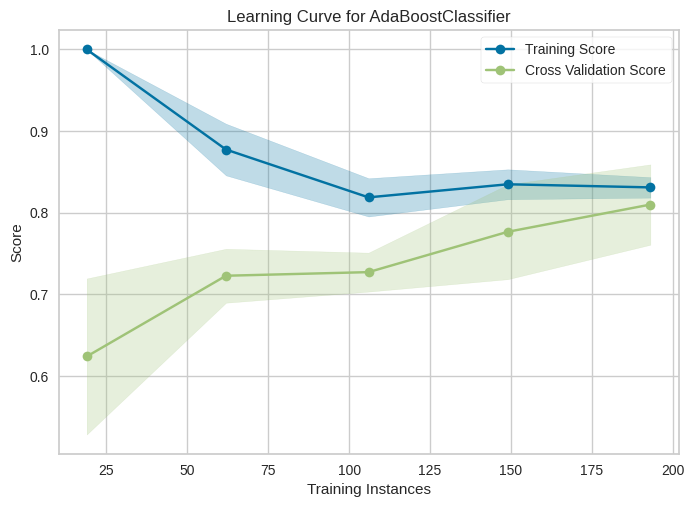

In [22]:
# --- AdaBoost Parameters ---
parameter_ab = {
    "algo__n_estimators": [6, 7, 10]
    , "algo__learning_rate": [0.2, 0.4, 0.8]
}

# --- AdaBoost Algorithm ---
algo_ab = AdaBoostClassifier(random_state=1)

# --- Applying AdaBoost ---
acc_score_train_ab, acc_score_test_ab, best_score_ab = fit_ml_models(algo_ab, parameter_ab, "AdaBoost", x_train, y_train, x_test, y_test)

## 7.10 | Model Comparison

In [23]:
# --- Create Accuracy Comparison Table ---
df_compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 'Gaussian NB',
                                     'Decision Tree', 'Random Forest', 'Extra Tree Classifier', 'Gradient Boosting', 'AdaBoost'] 
                           , 'Accuracy Train': [acc_score_train_lr, acc_score_train_knn, acc_score_train_svc, acc_score_train_gnb,
                                                acc_score_train_dt, acc_score_train_rf, acc_score_train_et, acc_score_train_gb, acc_score_train_ab]
                           , 'Accuracy Test': [acc_score_test_lr, acc_score_test_knn, acc_score_test_svc, acc_score_test_gnb,
                                               acc_score_test_dt, acc_score_test_rf, acc_score_test_et, acc_score_test_gb, acc_score_test_ab]
                           , 'Best Score': [best_score_lr, best_score_knn, best_score_svc, best_score_gnb,best_score_dt, best_score_rf, 
                                            best_score_et, best_score_gb, best_score_ab]})

df_compare = df_compare.sort_values(by='Accuracy Test', ascending=False).reset_index(drop=True)
df_compare.head(10)

,Model,Accuracy Train,Accuracy Test,Best Score
0,Logistic Regression,85.124,88.525,0.8265
1,Random Forest,87.190,88.525,0.8388
2,Support Vector Machine,85.950,86.885,0.8187
3,Gradient Boosting,85.124,86.885,0.8268
4,Gaussian NB,81.818,86.885,0.7935
5,AdaBoost,83.884,86.885,0.8230
6,Extra Tree Classifier,83.471,85.246,0.8102
7,Decision Tree,84.711,81.967,0.7897
8,K-Nearest Neighbour,68.595,68.852,0.6488
